# Importing necessary modules

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Uploading Sample Dataset

In [4]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


# Creating DataFrame of the CSV file

In [5]:
df = pd.read_csv('dataset.csv')
df

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


# Checking any null values (if any)

In [6]:
df.isna().sum()

,0
Age,0
Height,0


#Plotting the Graph

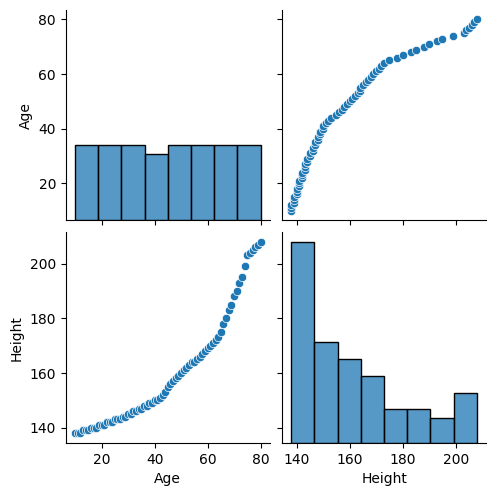

In [7]:
sns.pairplot(df)

# Distributing data into Independent and Target Varaibles

In [22]:
X = df[['Height']]
X.shape

(71, 1)

In [40]:
y = df[['Age']]
y.shape

(71, 1)

# Dividing Data into Ratio of 8:2 for training and testing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train.shape, X_test.shape

((56, 1), (15, 1))

# Creating Model Using Decision Tree Regressor and Fitting Training Data into it

In [24]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

# Testing all the Data left and comparing it with the Actual Values

In [49]:
y_pred = model.predict(X_test)
comparison = np.concatenate((y_pred.reshape(-1, 1), y_test.values.reshape(-1, 1)), 1)
comparison

array([[34.5, 36. ],
       [34.5, 37. ],
       [57. , 58. ],
       [33. , 32. ],
       [39. , 40. ],
       [60. , 61. ],
       [17. , 17. ],
       [68. , 69. ],
       [42. , 44. ],
       [79. , 80. ],
       [67. , 66. ],
       [39. , 38. ],
       [39. , 41. ],
       [51. , 52. ],
       [42. , 43. ]])

# Evaluating the Model

In [51]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 1.2
MSE: 1.7666666666666666
RMSE: 1.7666666666666666
R² Score: 0.993040235318836


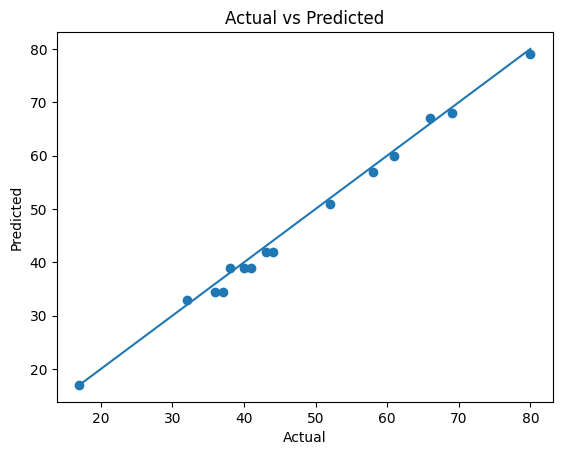

In [52]:
y_true = y_test.values

plt.figure()
plt.scatter(y_true, y_pred)
min_val = min(y_true.min(), y_pred.min())
max_val = max(y_true.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()